In [97]:
using Plots, LinearAlgebra, Random, Distributions

In [98]:
n = 500
eps = 10^-13

1.0e-13

In [99]:
function conjugate_gradient(A::AbstractMatrix, x,x_star::Array)
    x_0=x
    b = A*x_star
    error = [sqrt(((x-x_star)'*A*(x-x_star)))]
                   
    g=A*x_0-b
    d=-g
    prev_g = copy(g)
    iter = 0
    for i = 1:n
        if g'*g<eps
            return x_0,error
        end
        iter+=1
        t = (g'*g)/ (d'*A*d)                                                #basic conjugate gradient
        x_0 = x_0 + t*d
        prev_g = copy(g)
        g = g + t*A*d
        β = (g'*g) / (prev_g'*prev_g)
        d = -g + β*d

        err = x_0 - x_star
        push!(error,sqrt((err'*A*err)))
    end
    return x_0,error
end


conjugate_gradient (generic function with 1 method)

In [112]:
m = Int(n*0.8)

400

In [113]:
λ=0.00003

3.0e-5

In [114]:
T = collect(1000:1000:1000+1000*(n-m-1))

100-element Vector{Int64}:
   1000
   2000
   3000
   4000
   5000
   6000
   7000
   8000
   9000
  10000
  11000
  12000
  13000
      ⋮
  89000
  90000
  91000
  92000
  93000
  94000
  95000
  96000
  97000
  98000
  99000
 100000

In [115]:
D = rand(Uniform(-λ,λ),m)
diag = vcat(D.+1,T)
B = Diagonal(diag)
V = rand(n,n)
Q,R = qr(V)
A = Q'*B*Q

500×500 Matrix{Float64}:
 10373.3       302.868    -969.525  …   -586.406    1774.63     2305.87
   302.868    9512.39     -695.531     -1146.36      803.947    1533.71
  -969.525    -695.531   11380.7         490.65      431.852    -980.692
   253.186   -1914.39     1507.88       -523.812   -1822.85    -1872.06
  -540.763   -2234.85      410.912      -405.022    -761.778    -589.301
   564.352     -98.8648  -1669.06   …   2746.05     -567.295    1534.09
 -2703.64    -2065.39     1171.35        -58.0616   -579.334   -1003.18
  1432.85    -1068.51     -479.254      1166.24     -410.117   -1473.65
  -784.408     664.537     207.432      -379.485   -1560.0      -668.776
 -1092.57     -507.641    1571.37        852.853   -2079.94      298.345
   503.711      23.0841  -2787.41   …   -238.091    -548.143   -1593.97
 -3029.01      261.196    -109.396        60.9382  -1680.73      311.009
   619.424   -1183.74     -579.108      2166.92      174.677     194.446
     ⋮                           

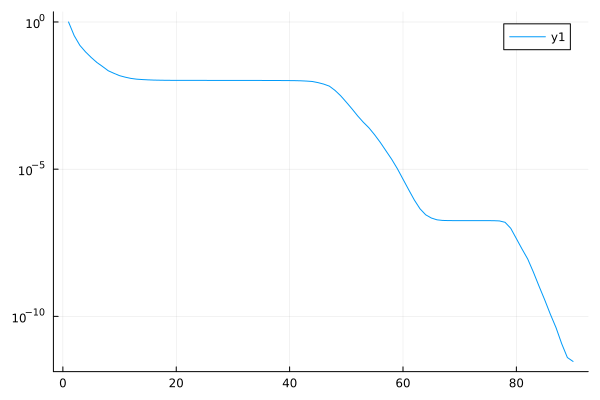

In [116]:
x_star = rand(n)
x_0 = zeros(n)

x,error = conjugate_gradient(A,x_0,x_star)
plot(error/error[1], yaxis =:log)

In [117]:
B

500×500 Diagonal{Float64, Vector{Float64}}:
 0.999981   ⋅        ⋅        ⋅       …       ⋅        ⋅        ⋅         ⋅ 
  ⋅        1.00002   ⋅        ⋅               ⋅        ⋅        ⋅         ⋅ 
  ⋅         ⋅       1.00002   ⋅               ⋅        ⋅        ⋅         ⋅ 
  ⋅         ⋅        ⋅       1.00001          ⋅        ⋅        ⋅         ⋅ 
  ⋅         ⋅        ⋅        ⋅               ⋅        ⋅        ⋅         ⋅ 
  ⋅         ⋅        ⋅        ⋅       …       ⋅        ⋅        ⋅         ⋅ 
  ⋅         ⋅        ⋅        ⋅               ⋅        ⋅        ⋅         ⋅ 
  ⋅         ⋅        ⋅        ⋅               ⋅        ⋅        ⋅         ⋅ 
  ⋅         ⋅        ⋅        ⋅               ⋅        ⋅        ⋅         ⋅ 
  ⋅         ⋅        ⋅        ⋅               ⋅        ⋅        ⋅         ⋅ 
  ⋅         ⋅        ⋅        ⋅       …       ⋅        ⋅        ⋅         ⋅ 
  ⋅         ⋅        ⋅        ⋅               ⋅        ⋅        ⋅         ⋅ 
  ⋅         ⋅        ⋅        ⋅ 